In [1]:
# Importar bibliotecas necessárias
import pandas as pd

# Caminho do arquivo no ambiente do Kaggle
file_path = '/kaggle/input/python-m10-support-material/Python_M10_support material.csv'

# Carregar os dados
data = pd.read_csv(file_path)

# Visualizar as primeiras linhas do dataset
data.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


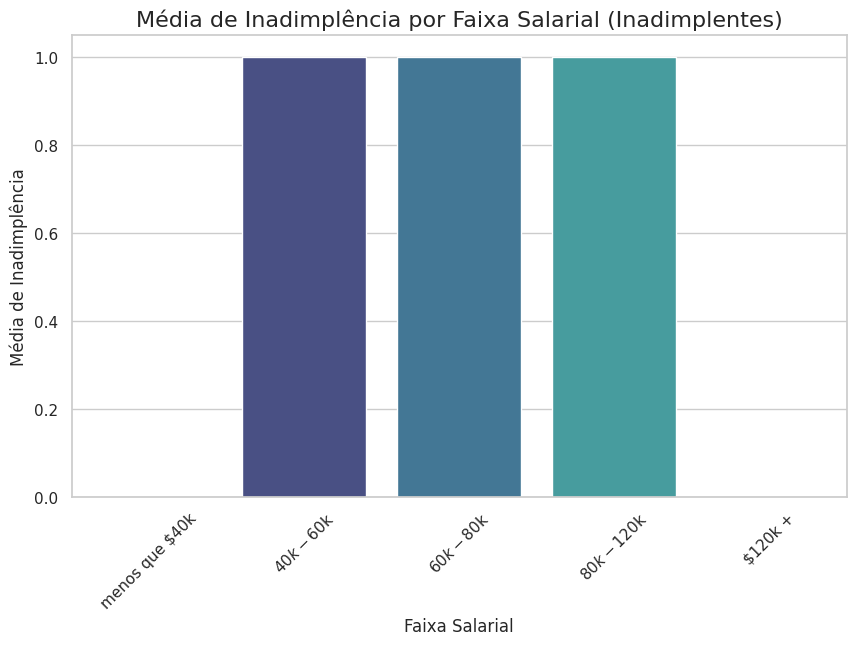

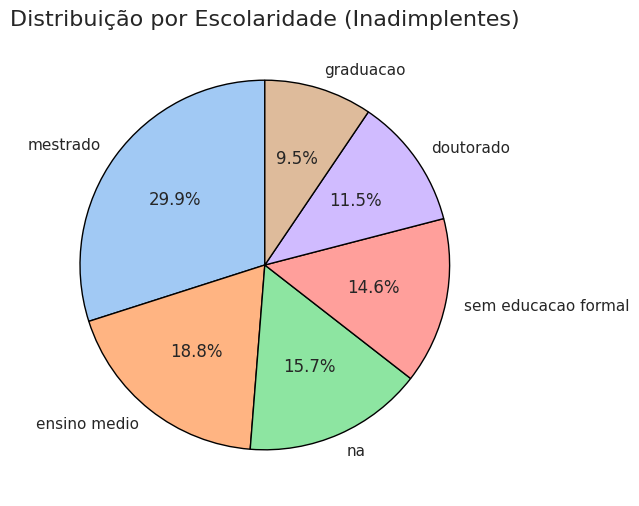

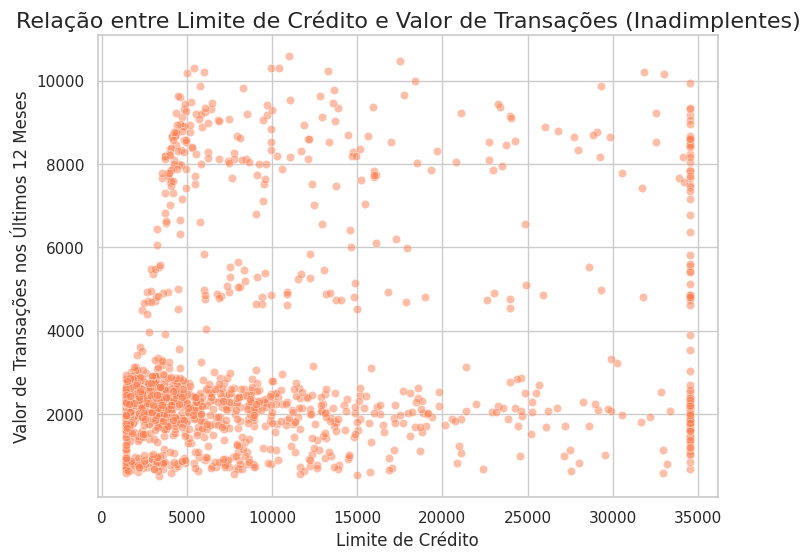

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


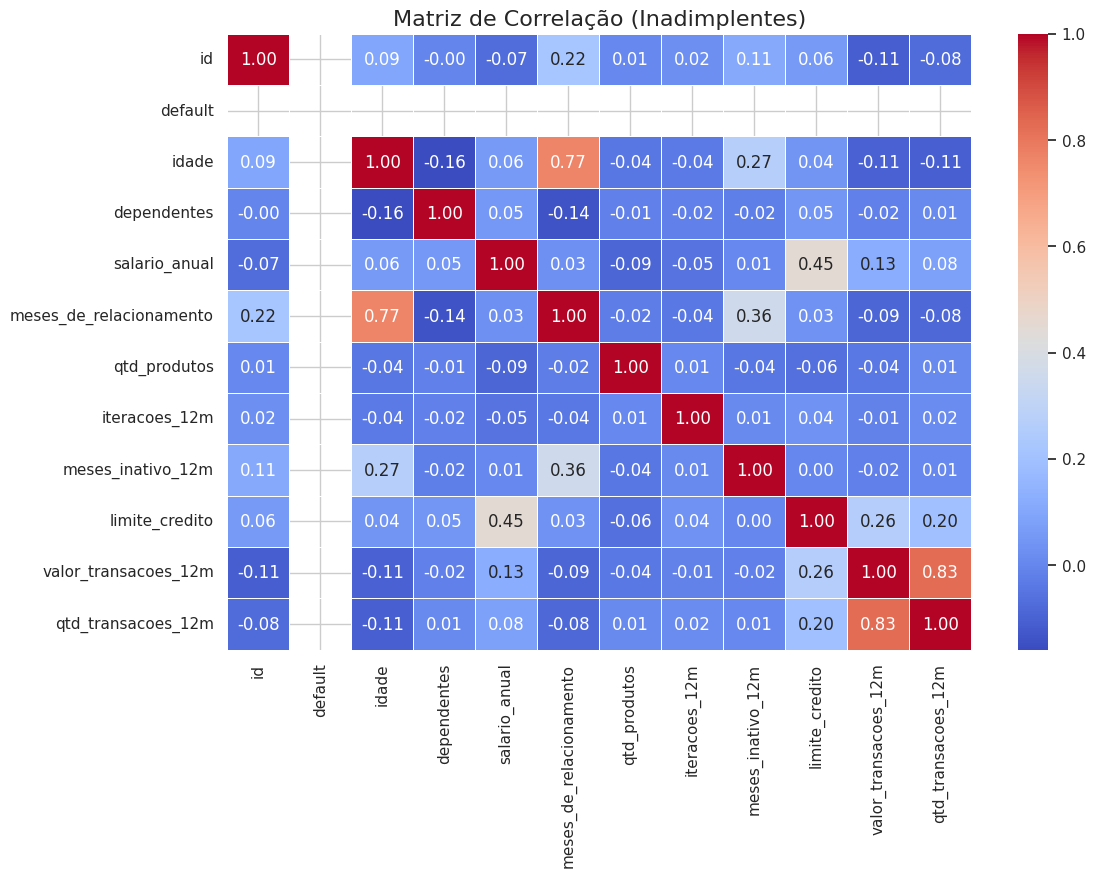

Resumo categórico dos inadimplentes:
        sexo escolaridade estado_civil tipo_cartao
count   1627         1627         1627        1627
unique     2            6            4           4
top        F     mestrado       casado        blue
freq     930          487          709        1519

Resumo numérico dos inadimplentes:
                 id  default        idade  dependentes  salario_anual  \
count  1.627000e+03   1627.0  1627.000000  1627.000000     702.000000   
mean   7.352614e+08      1.0    46.659496     2.402581   72621.082621   
std    3.557725e+07      0.0     7.665652     1.275010   21411.570724   
min    7.080833e+08      1.0    26.000000     0.000000   50000.000000   
25%    7.123713e+08      1.0    41.000000     2.000000   50000.000000   
50%    7.165644e+08      1.0    47.000000     2.000000   70000.000000   
75%    7.683737e+08      1.0    52.000000     3.000000  100000.000000   
max    8.282949e+08      1.0    68.000000     5.000000  100000.000000   

       meses_d

In [2]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuração de estilo para os gráficos
sns.set(style="whitegrid")

# Caminho do arquivo no ambiente do Kaggle
file_path = os.path.join('/kaggle/input/python-m10-support-material/Python_M10_support material.csv')

# Carregar os dados
try:
    df = pd.read_csv(file_path, encoding='utf8')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin1')

def calcular_media_faixa(salario_str):
    if isinstance(salario_str, str):
        salario_str = salario_str.replace('$', '').strip()
        if '-' in salario_str:
            try:
                low, high = map(float, salario_str.replace('K', '000').split('-'))
                return (low + high) / 2
            except ValueError:
                return None
        else:
            try:
                 return float(salario_str.replace('K', '000'))
            except ValueError:
                 return None
    return salario_str


# Converter faixa salarial para numérico
df['salario_anual'] = df['salario_anual'].apply(calcular_media_faixa)



# Criar faixas salariais
bins = [0, 40000, 60000, 80000, 120000, 1e6]
labels = ['menos que $40k', '$40k-$60k', '$60k-$80k', '$80k-$120k', '$120k +']
df['faixa_salarial'] = pd.cut(df['salario_anual'], bins=bins, labels=labels)

# Remover caracteres indesejados das colunas monetárias e convertê-las para numérico
df['limite_credito'] = df['limite_credito'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)

# Excluindo espaços desnecessários nas colunas categóricas
categorical_columns = ['sexo', 'escolaridade', 'estado_civil', 'tipo_cartao']
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.str.strip())

# Filtrar apenas inadimplentes
inadimplentes = df[df['default'] == 1]

# Média de inadimplência por faixa salarial (apenas inadimplentes)
inadimplencia_por_salario = inadimplentes.groupby('faixa_salarial', observed=True)['default'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=inadimplencia_por_salario.index, y=inadimplencia_por_salario.values, palette='mako')
plt.title('Média de Inadimplência por Faixa Salarial (Inadimplentes)', fontsize=16)
plt.xlabel('Faixa Salarial', fontsize=12)
plt.ylabel('Média de Inadimplência', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Proporção por escolaridade (apenas inadimplentes)
plt.figure(figsize=(8, 6))
inadimplentes['escolaridade'].value_counts(normalize=True).plot.pie(
    autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'}
)
plt.title('Distribuição por Escolaridade (Inadimplentes)', fontsize=16)
plt.ylabel('')
plt.show()

# Gráfico de dispersão filtrado apenas para inadimplentes
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='limite_credito', y='valor_transacoes_12m', data=inadimplentes, alpha=0.5, color='coral'
)
plt.title('Relação entre Limite de Crédito e Valor de Transações (Inadimplentes)', fontsize=16)
plt.xlabel('Limite de Crédito', fontsize=12)
plt.ylabel('Valor de Transações nos Últimos 12 Meses', fontsize=12)
plt.show()

# Heatmap de correlação (apenas inadimplentes)
plt.figure(figsize=(12, 8))
correlation_matrix_inadimplentes = inadimplentes.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix_inadimplentes, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação (Inadimplentes)', fontsize=16)
plt.show()

# Exibir resumos descritivos
categorical_summary_inadimplentes = inadimplentes[categorical_columns].describe()
numeric_summary_inadimplentes = inadimplentes.describe()

print("Resumo categórico dos inadimplentes:")
print(categorical_summary_inadimplentes)

print("\nResumo numérico dos inadimplentes:")
print(numeric_summary_inadimplentes)